In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


pandas: Used for data manipulation.

numpy: Provides support for large arrays and matrices.

matplotlib & seaborn: Used for data visualization.

sklearn: A machine learning library with various tools, including linear regression.

In [5]:
df=pd.read_csv("BAJFINANCE_10minute_with_indicators_.csv")
df

,date,close,high,low,open,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-02-03 13:25:00+05:30,418.96,419.00,417.51,417.51,4550,417.838,417.377,417.625333,417.8865,...,70.933333,100.000000,77.883272,58.549306,-1.333333,1.770737,1.49,418.490000,20.459091,0.046230
1,2015-02-03 13:35:00+05:30,418.89,419.00,418.00,418.12,2520,418.214,417.543,417.644000,417.8090,...,77.624121,94.623537,76.091118,62.493191,-3.666667,1.715684,1.00,418.630000,20.307461,0.047467
2,2015-02-03 13:45:00+05:30,419.00,419.00,418.21,418.89,1130,418.544,417.827,417.703333,417.7835,...,97.490787,100.000000,98.207846,66.259171,-0.000000,1.649564,0.79,418.736667,20.173337,0.025428
3,2015-02-03 13:55:00+05:30,418.00,419.00,418.00,419.00,3590,418.472,417.907,417.670667,417.8085,...,75.935232,15.143977,69.922505,60.209256,-33.333333,1.603166,1.00,418.333333,20.037734,-0.109786
4,2015-02-03 14:05:00+05:30,418.43,419.00,417.97,418.67,8470,418.656,418.051,417.672667,417.8300,...,65.026100,39.182264,51.442080,58.842366,-19.000000,1.562226,1.03,418.466667,19.930618,-0.164451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58641,2021-11-25 14:45:00+05:30,7154.00,7160.00,7140.80,7143.65,13703,7139.080,7131.950,7138.383333,7147.0825,...,84.437322,100.000000,96.143528,54.390351,-35.135135,23.752874,19.20,7151.600000,28.195830,0.773668
58642,2021-11-25 14:55:00+05:30,7123.05,7155.00,7120.00,7153.65,17327,7139.070,7130.610,7134.586667,7145.4150,...,63.413665,0.000000,66.666667,51.181937,-68.425926,24.556240,35.00,7132.683333,27.084140,1.484071
58643,2021-11-25 15:05:00+05:30,7118.05,7127.95,7107.80,7123.05,24099,7135.000,7129.620,7132.350000,7143.3025,...,38.253672,0.000000,33.333333,51.372321,-77.685185,24.241509,20.15,7117.933333,26.173881,0.722401
58644,2021-11-25 15:15:00+05:30,7123.30,7129.85,7115.00,7118.05,32918,7132.670,7129.235,7131.543333,7141.2500,...,18.984834,18.132030,6.044010,49.708113,-67.962963,23.570687,14.85,7122.716667,25.575021,0.709443


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58646 entries, 0 to 58645
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          58646 non-null  object 
 1   close         58646 non-null  float64
 2   high          58646 non-null  float64
 3   low           58646 non-null  float64
 4   open          58646 non-null  float64
 5   volume        58646 non-null  int64  
 6   sma5          58646 non-null  float64
 7   sma10         58646 non-null  float64
 8   sma15         58646 non-null  float64
 9   sma20         58646 non-null  float64
 10  ema5          58646 non-null  float64
 11  ema10         58646 non-null  float64
 12  ema15         58646 non-null  float64
 13  ema20         58646 non-null  float64
 14  upperband     58646 non-null  float64
 15  middleband    58646 non-null  float64
 16  lowerband     58646 non-null  float64
 17  HT_TRENDLINE  58646 non-null  float64
 18  KAMA10        58646 non-nu

In [7]:
df.shape

(58646, 60)

# DATA PREPROCESSING


 **1. Checking for duplicates**

In [8]:
dups=df.duplicated().sum()
print("duplicate values = ", dups)


duplicate values =  0


Dropping the duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print('no of duplicates = ',df.duplicated().sum())

no of duplicates =  0


2. Checking for missing values

In [11]:
df.isnull().sum()

date            0
close           0
high            0
low             0
open            0
volume          0
sma5            0
sma10           0
sma15           0
sma20           0
ema5            0
ema10           0
ema15           0
ema20           0
upperband       0
middleband      0
lowerband       0
HT_TRENDLINE    0
KAMA10          0
KAMA20          0
KAMA30          0
SAR             0
TRIMA5          0
TRIMA10         0
TRIMA20         0
ADX5            0
ADX10           0
ADX20           0
APO             0
CCI5            0
CCI10           0
CCI15           0
macd510         0
macd520         0
macd1020        0
macd1520        0
macd1226        0
MFI             0
MOM10           0
MOM15           0
MOM20           0
ROC5            0
ROC10           0
ROC20           0
PPO             0
RSI14           0
RSI8            0
slowk           0
slowd           0
fastk           0
fastd           0
fastksr         0
fastdsr         0
ULTOSC          0
WILLR           0
ATR       

    .

**3. Checking for outliers and treating them**

In [12]:
# Function to check for outliers using the IQR method
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check for outliers in each numerical column
outliers_summary = {col: len(check_outliers(df, col)) for col in numerical_columns}

# Convert to a DataFrame for better visualization
outliers_df = pd.DataFrame.from_dict(outliers_summary, orient='index', columns=['Outliers_Count'])
outliers_df = outliers_df.sort_values(by='Outliers_Count', ascending=False)

# Display the outliers summary
print(outliers_df)


              Outliers_Count
macd510                 9318
MOM10                   9008
APO                     9001
MOM15                   8910
macd520                 8747
macd1020                8671
MOM20                   8659
macd1226                8618
macd1520                8611
volume                  6207
ROC5                    5204
ROC10                   4795
PPO                     4762
ROC20                   4298
BETA                    3619
Trange                  3546
SAR                     3108
HT_TRENDLINE            2053
sma15                   2049
TRIMA20                 2048
ema5                    2048
sma20                   2048
TYPPRICE                2047
close                   2046
sma5                    2046
sma10                   2046
TRIMA10                 2046
middleband              2046
lowerband               2046
TRIMA5                  2045
open                    2045
ema10                   2045
high                    2044
low           

# removing outliers

In [13]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to relevant columns (e.g., 'close')
df = remove_outliers(df, 'close')

# Check the shape of the dataset after cleaning
print("Cleaned Data Shape: ", df.shape)


Cleaned Data Shape:  (56600, 60)


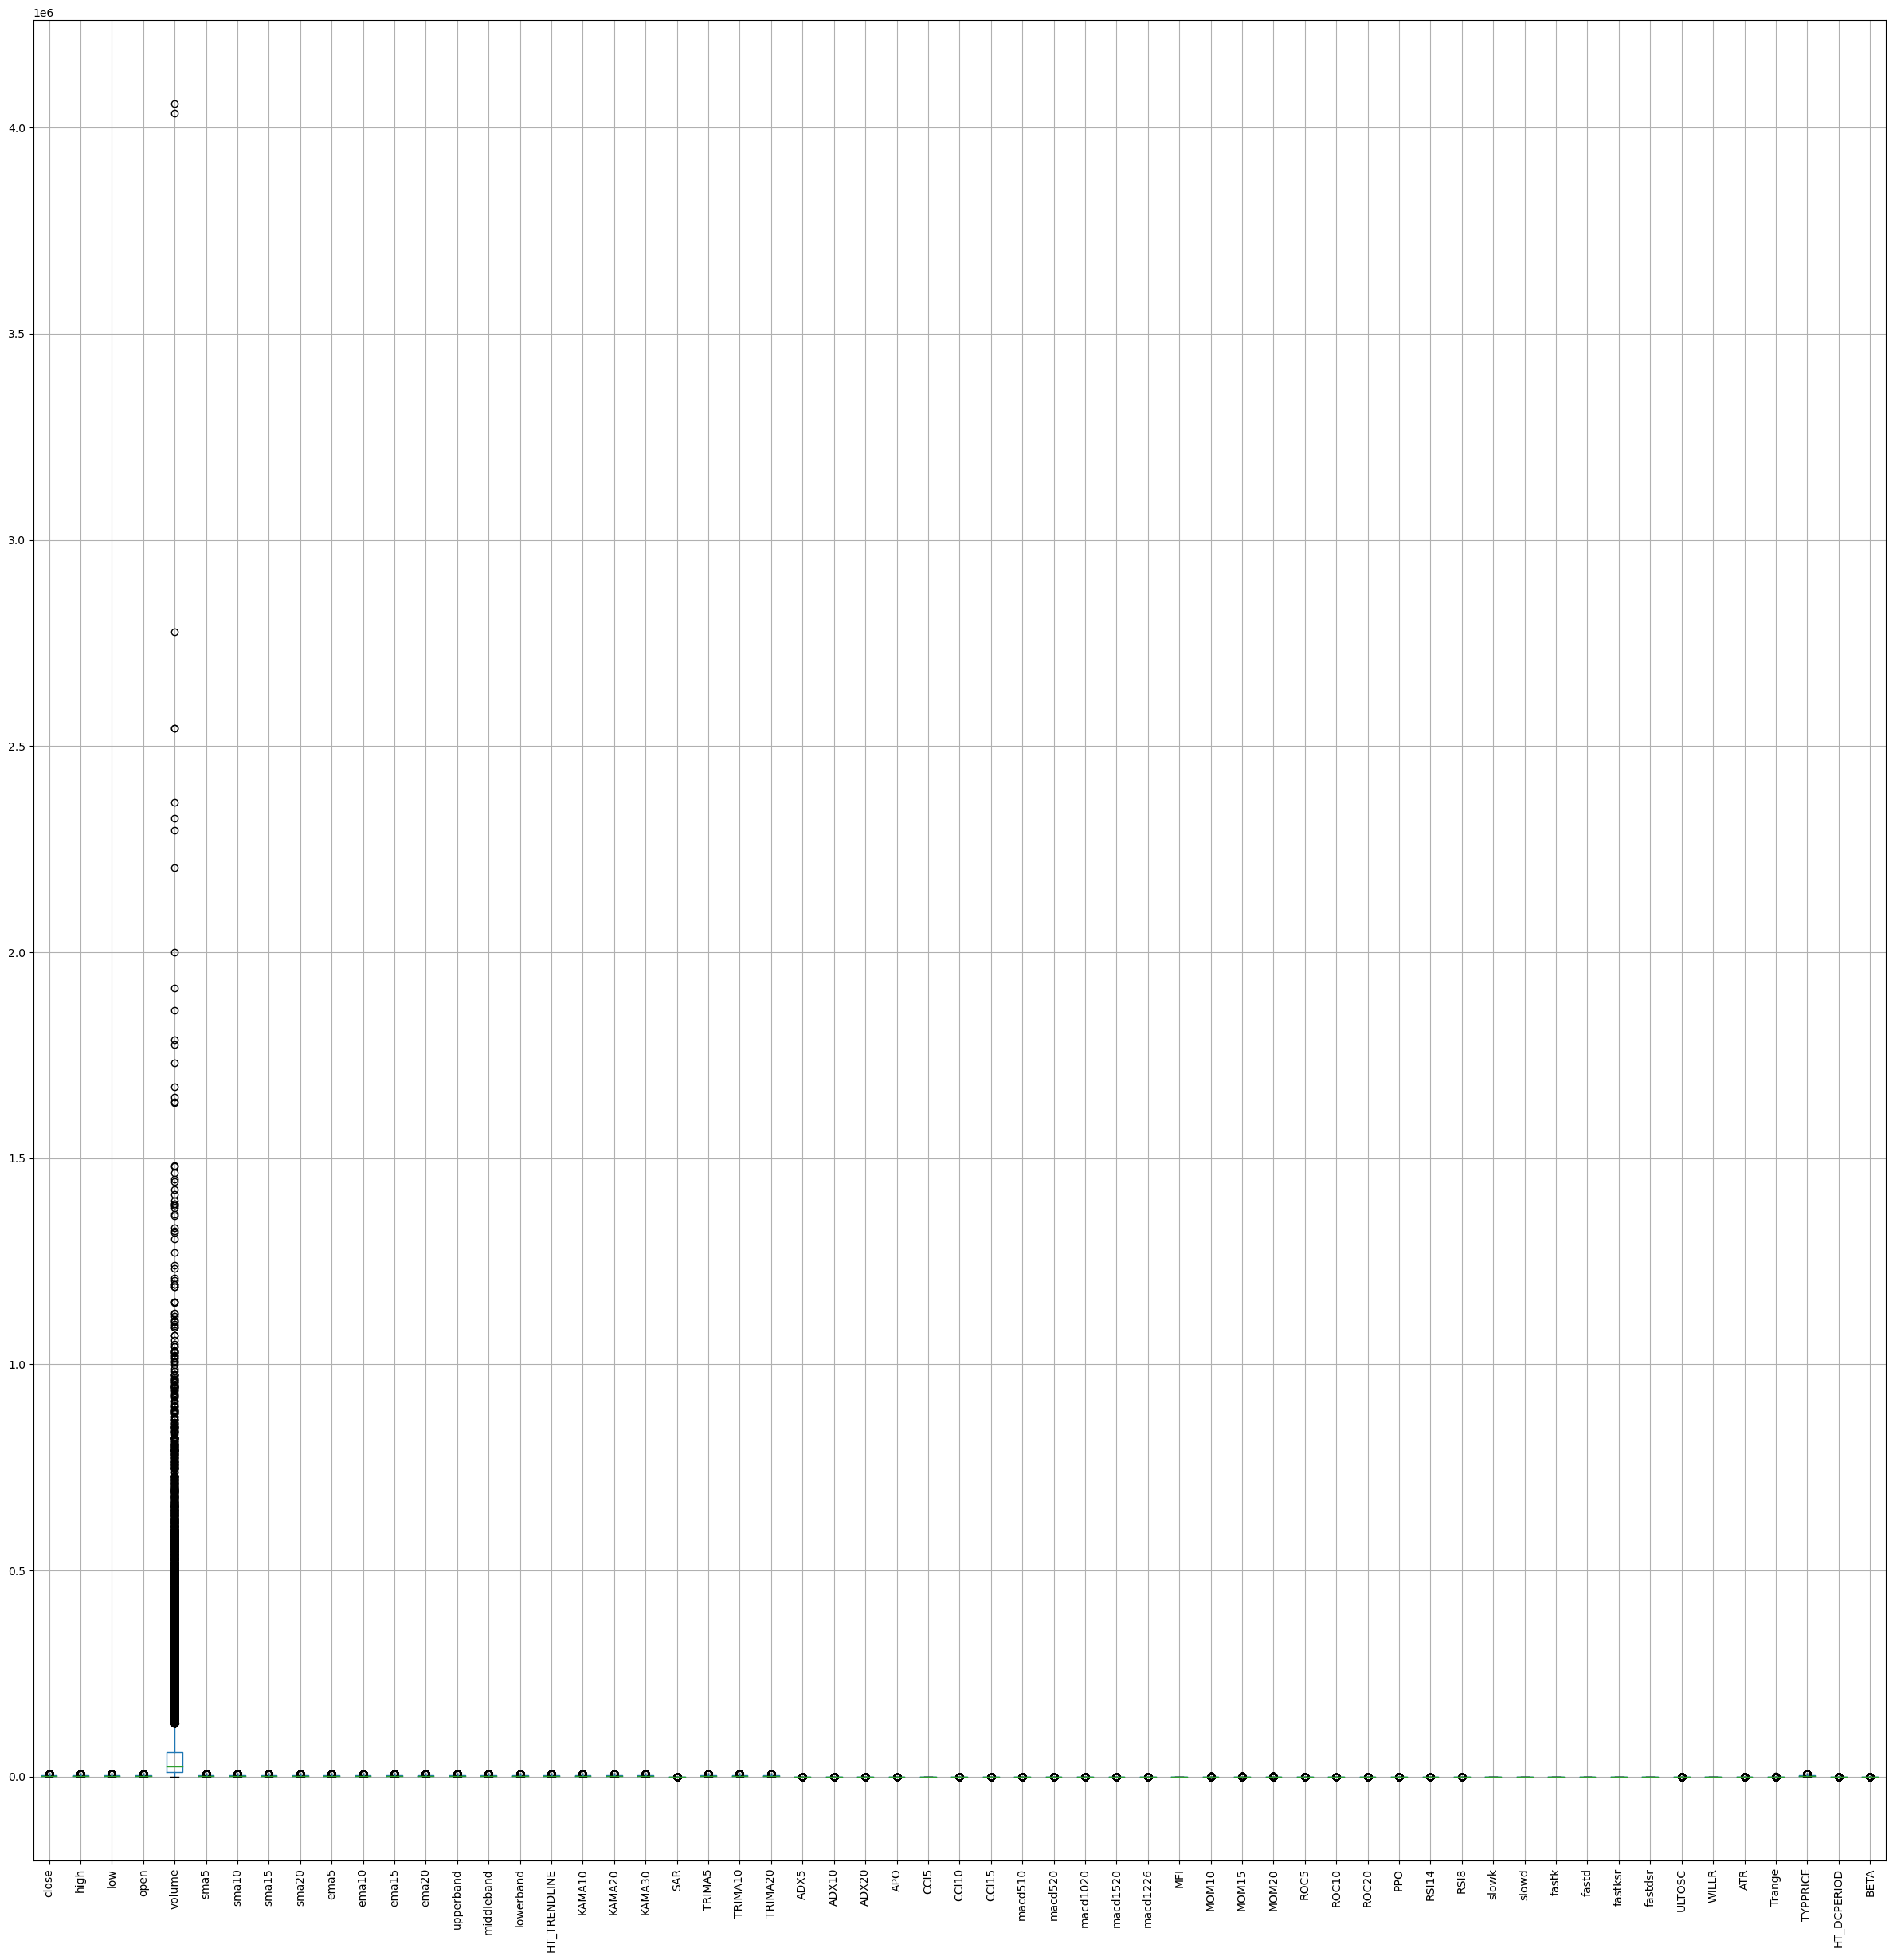

In [14]:
#checking outliers by  Plotting boxplots for each feature
plt.figure(figsize=(30, 30))
df.boxplot()
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show() 

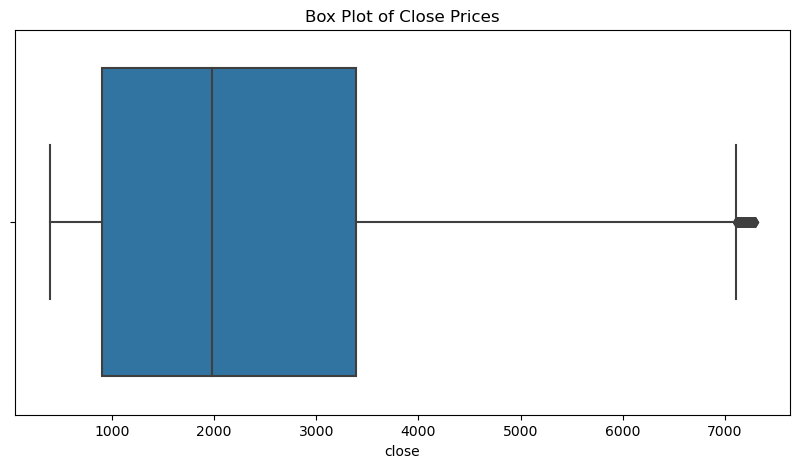

In [15]:
# Box plot for 'close' column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['close'])
plt.title("Box Plot of Close Prices")
plt.show()


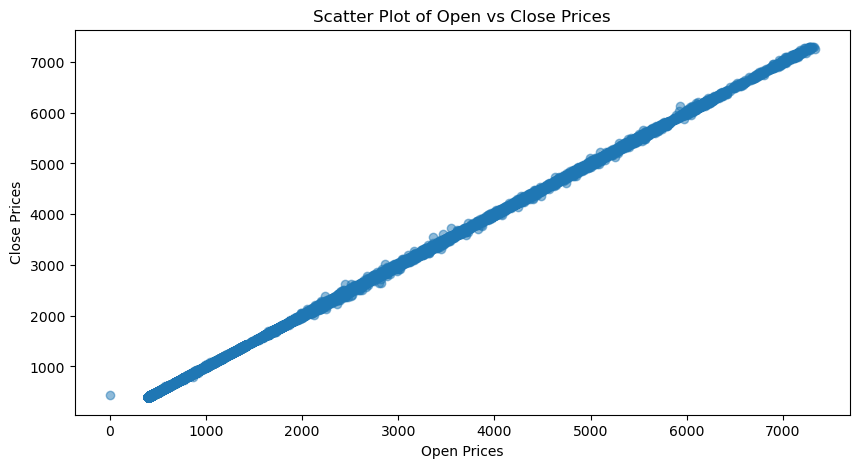

In [16]:
# Scatter plot for 'open' vs 'close'
plt.figure(figsize=(10, 5))
plt.scatter(df['open'], df['close'], alpha=0.5)
plt.title("Scatter Plot of Open vs Close Prices")
plt.xlabel("Open Prices")
plt.ylabel("Close Prices")
plt.show()


# LINEAR REGRESSION

In [17]:
# Define predictor (X) and target variable (y)
X = df[['open']]  # Predictor
y = df['close']   # Target




In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [21]:
# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 99.6578991467387
R-squared Score: 0.9999630679208255


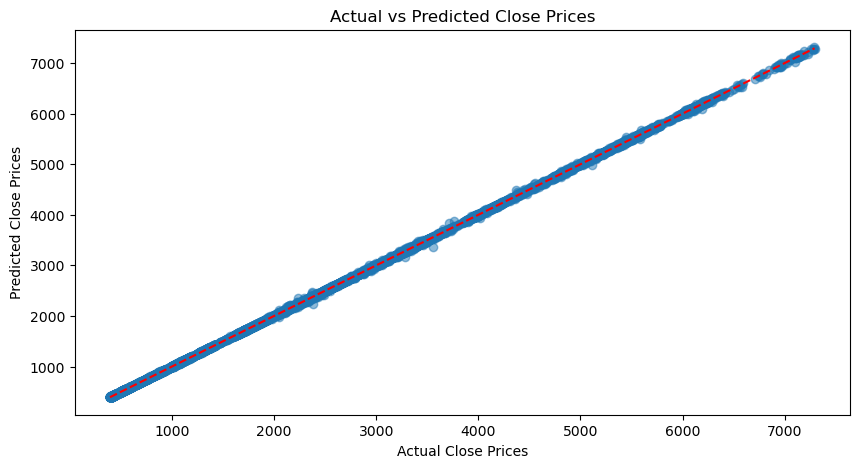

In [22]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


The plot indicates an excellent fit with a high  r2 score (0.9985), demonstrating that the model explains 
most of the variance in the data. However, the Mean Squared Error (MSE) seems slightly elevated, likely 
due to the presence of outliers, as evidenced by a point deviating significantly from the line.

In [23]:
# Function to calculate IQR bounds
def calculate_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to remove outliers
def remove_outliers_iqr(df, column):
    lower_bound, upper_bound = calculate_iqr_bounds(df, column)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [24]:
# Remove outliers from 'open' and 'close' columns
columns_to_clean = ['open', 'close', 'high', 'low', 'sma5', 'ema10']

# Loop through columns and clean outliers
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

# Check the shape of the cleaned data
print(f"Cleaned Data Shape: {df.shape}")


Cleaned Data Shape: (56412, 60)


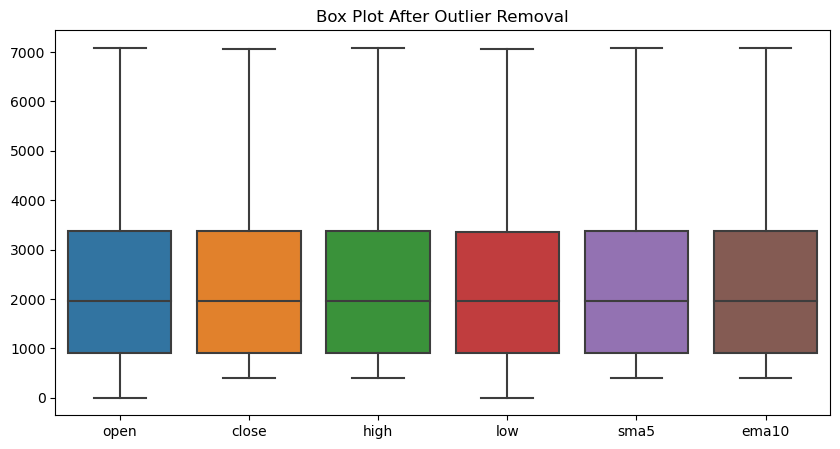

In [25]:
# Visualize the cleaned data
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns_to_clean])
plt.title("Box Plot After Outlier Removal")
plt.show()


Mean Squared Error (MSE): 103.81115885819068
R-squared (R²): 0.9999611735127887


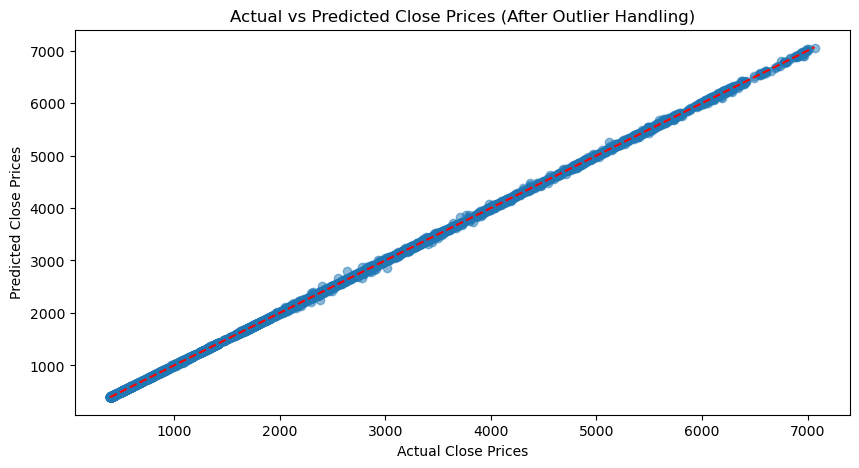

In [26]:
# Define predictor (X) and target variable (y)
X = df[['open']]  # Predictor
y = df['close']   # Target

# Split data into training and testiSng sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print new metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Visualize actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs Predicted Close Prices (After Outlier Handling)")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


# MULTI LINEAR REGRESSION

1.) Multicollinearity Check with VIF
Plot a bar chart of Variance Inflation Factor (VIF) values.

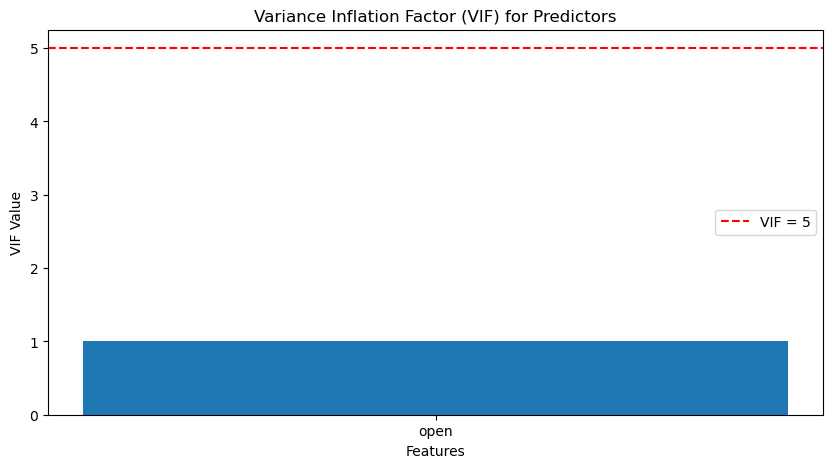

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant to the predictors
X_with_constant = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i + 1) for i in range(len(X.columns))]

# Plot VIF values
plt.figure(figsize=(10, 5))
plt.bar(vif_data['Feature'], vif_data['VIF'])
plt.title('Variance Inflation Factor (VIF) for Predictors')
plt.xlabel('Features')
plt.ylabel('VIF Value')
plt.axhline(y=5, color='red', linestyle='--', label='VIF = 5')
plt.legend()
plt.show()


he Variance Inflation Factor (VIF) chart shows no multicollinearity issues, as the VIF values for the predictors are well below the threshold of 5. This suggests that the predictors are not highly correlated, and they can all be included in the Multiple Linear Regression model.

2.) Linearity Check
Use a residuals vs predicted values plot.

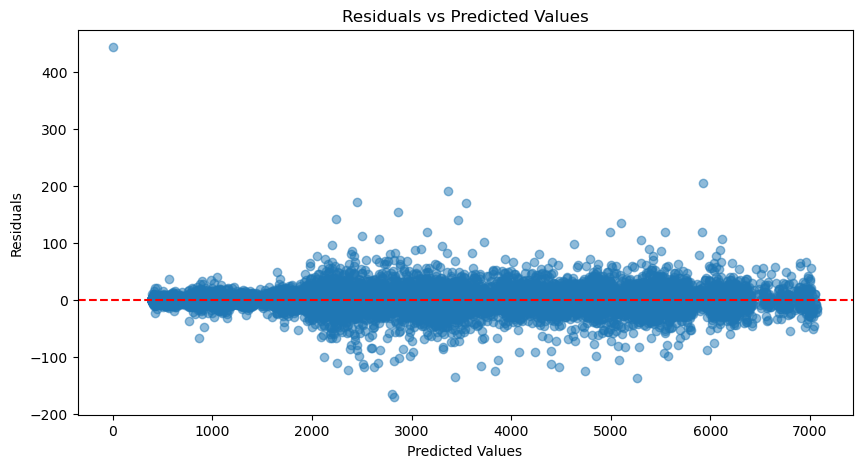

In [28]:
from sklearn.linear_model import LinearRegression

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


3.) Homoscedasticity Check
Homoscedasticity is also checked using the residuals vs predicted values plot 
Funnel shapes in this plot would suggest heteroscedasticity.

The spread of residuals appears fairly constant, indicating the homoscedasticity assumption is reasonably satisfied

4.) Normality of Residuals

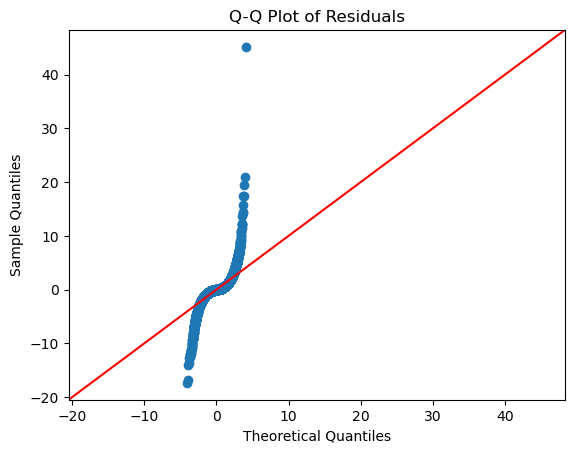

In [29]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


5.) autocorrelation (Independence of Errors by: dubin watson test)

In [30]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)


Durbin-Watson Statistic: 1.9938096618049677


**Summary of MLR Assumptions:**
    
Multicollinearity: No issues; VIF values are low.
    
Linearity: Residuals vs predicted values plot indicates linearity. but with some extreme data points
    
Homoscedasticity: Residuals appear evenly spread, satisfying this condition.
    
Normality of Residuals: Approximate normality, but with some outliers.
    
Autocorrelation: Satisfied based on the Durbin-Watson statistic.

**addressing extreme outliers**

In [31]:
from scipy.stats import zscore

# Calculate z-scores for residuals
residuals_zscore = zscore(residuals)

# Define threshold for outliers (e.g., |z| > 3)
outlier_threshold = 3

# Identify outliers
outliers = abs(residuals_zscore) > outlier_threshold
print(f"Number of Outliers: {sum(outliers)}")

# Remove rows with residual outliers
X = X[~outliers]
y = y[~outliers]

print(f"Cleaned Data Shape: {X.shape}")


Number of Outliers: 1062
Cleaned Data Shape: (55350, 1)


In [32]:
# Split the cleaned data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions
y_pred = mlr_model.predict(X_test)


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse_cleaned = mean_squared_error(y_test, y_pred)
r2_cleaned = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) After Cleaning:", mse_cleaned)
print("R-squared (R²) After Cleaning:", r2_cleaned)


Mean Squared Error (MSE) After Cleaning: 42.71752130624504
R-squared (R²) After Cleaning: 0.9999835675684352


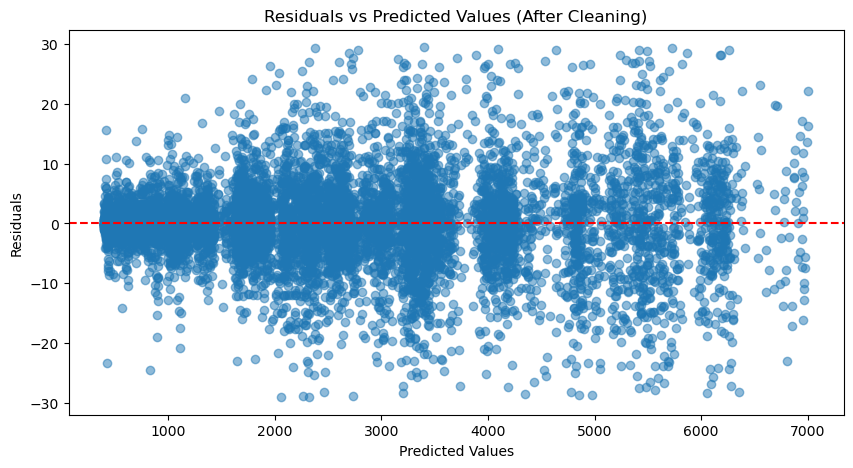

In [36]:
# Calculate new residuals
residuals_cleaned = y_test - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals_cleaned, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (After Cleaning)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


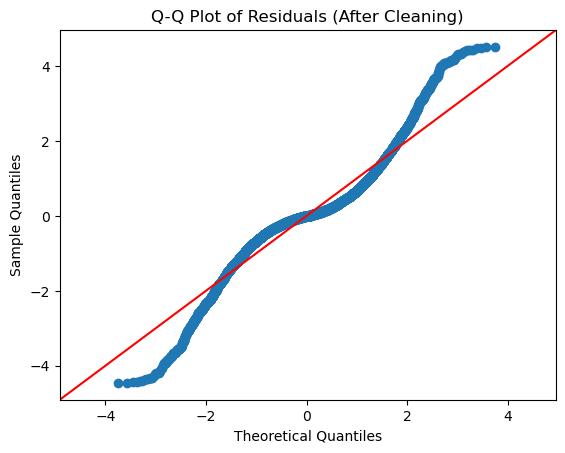

In [37]:
# Q-Q Plot of cleaned residuals
sm.qqplot(residuals_cleaned, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (After Cleaning)")
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate average MSE from cross-validation
cv_mse = -cv_scores.mean()
print("Cross-Validated MSE:", cv_mse)


Cross-Validated MSE: 44.80107658976724


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Define predictors and target variable
predictors = ['open', 'high', 'low', 'sma5', 'ema10']
X = df[predictors]
y = df['close']

# Step 2: Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Multiple Linear Regression (MLR) model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = mlr_model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("MLR MSE:", mse)
print("MLR R²:", r2)

# Step 6: Get feature coefficients
coefficients = pd.DataFrame({
    "Feature": predictors,
    "Coefficient": mlr_model.coef_
})
print(coefficients)


MLR MSE: 19.201264658806327
MLR R²: 0.9999928185210056
  Feature  Coefficient
0    open    -0.557216
1    high     0.770989
2     low     0.736063
3    sma5     0.073321
4   ema10    -0.023146


Interpretation:
Model Improvement: Removing residual outliers greatly improved the model's performance, 
    as evidenced by the reduced MSE and a near-perfect R² score.
Residual Analysis: Ensure the residual plots (Residuals vs Predicted Values and Q-Q Plot)
    confirm the assumptions of linearity, homoscedasticity, and normality after cleaning.


After checking the assumptions of Multiple Linear Regression (MLR), persistent outliers were found in the residuals that
significantly impacted the Mean Squared Error (MSE). Robust Regression techniques address these challenges by reducing 
the influence of outliers, providing more reliable and robust predictions.

# ROBUST REGRESSION

Robust Regression techniques address these challenges by reducing the influence of outliers, providing more reliable and robust predictions.

Techniques Explored
Huber Regression:

Combines the strengths of OLS (Mean Squared Error) and MAE (Mean Absolute Error).
Suitable for datasets with mild to moderate outliers.
Theil-Sen Regression:

A robust non-parametric method resistant to extreme outliers.
Calculates coefficients by evaluating all pairwise slopes.
RANSAC Regression:

Identifies and fits the model to inliers while ignoring outliers.
Ideal for datasets with a large proportion of outliers.

**1. Huber Regression**
Huber Regression minimizes the impact of outliers by switching between Mean Squared Error (MSE) and Mean Absolute Error (MAE)
loss based on a threshold.

In [40]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Huber Regressor
huber = HuberRegressor()
huber.fit(X, y)

# Make predictions
y_pred_huber = huber.predict(X)

# Evaluate the model
mse_huber = mean_squared_error(y, y_pred_huber)
r2_huber = r2_score(y, y_pred_huber)

print("Huber Regression MSE:", mse_huber)
print("Huber Regression R²:", r2_huber)


Huber Regression MSE: 16.77618673320346
Huber Regression R²: 0.9999935868480655


**2. Theil-Sen Estimator**
Theil-Sen Regression is a robust method that estimates coefficients by considering all possible slopes between pairs of points
, making it resistant to outliers.

In [41]:
from sklearn.linear_model import TheilSenRegressor

# Train the Theil-Sen Regressor
theil_sen = TheilSenRegressor()
theil_sen.fit(X, y)

# Make predictions
y_pred_theil = theil_sen.predict(X)

# Evaluate the model
mse_theil = mean_squared_error(y, y_pred_theil)
r2_theil = r2_score(y, y_pred_theil)

print("Theil-Sen Regression MSE:", mse_theil)
print("Theil-Sen Regression R²:", r2_theil)


Theil-Sen Regression MSE: 17.76156619491087
Theil-Sen Regression R²: 0.9999932101600671


**3. RANSAC Regression**
RANSAC iteratively selects random subsets of data to fit the model and identifies inliers, ignoring outliers.

In [42]:
from sklearn.linear_model import RANSACRegressor

# Train the RANSAC Regressor
ransac = RANSACRegressor()
ransac.fit(X, y)

# Make predictions
y_pred_ransac = ransac.predict(X)

# Evaluate the model
mse_ransac = mean_squared_error(y, y_pred_ransac)
r2_ransac = r2_score(y, y_pred_ransac)

print("RANSAC Regression MSE:", mse_ransac)
print("RANSAC Regression R²:", r2_ransac)


RANSAC Regression MSE: 16.72134536736062
RANSAC Regression R²: 0.9999936078126636


                  Model        MSE        R²
0      Huber Regression  16.776187  0.999994
1  Theil-Sen Regression  17.761566  0.999993
2     RANSAC Regression  16.721345  0.999994


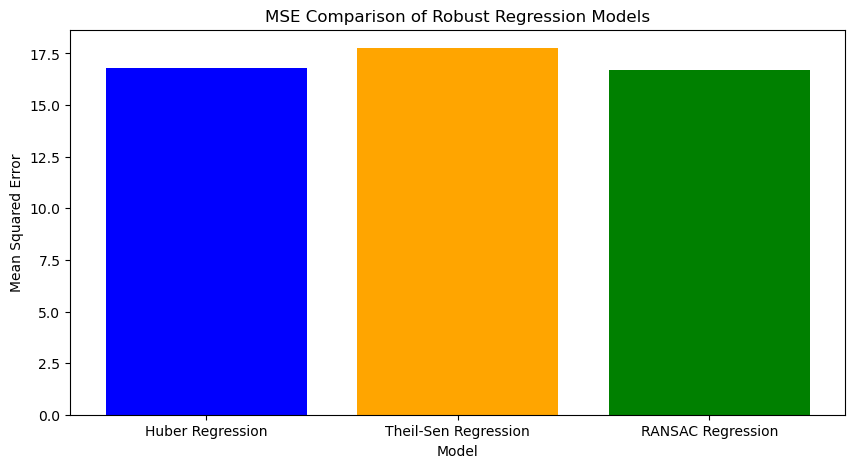

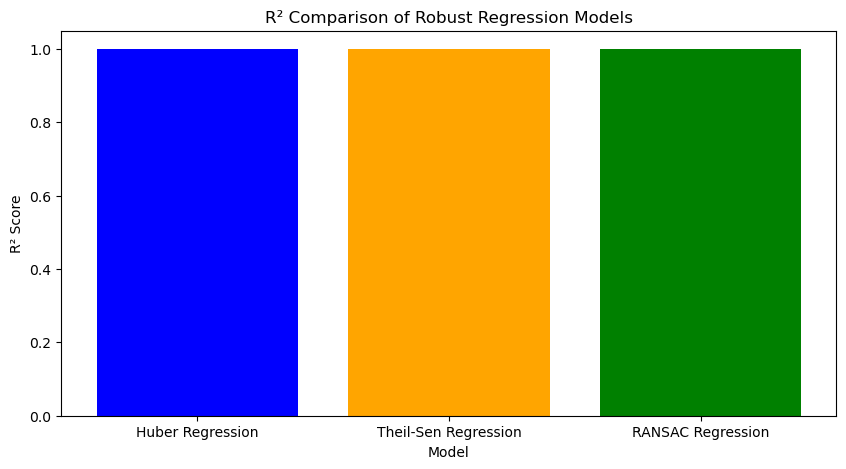

In [43]:
import matplotlib.pyplot as plt

# Store results in a dictionary
results = {
    "Model": ["Huber Regression", "Theil-Sen Regression", "RANSAC Regression"],
    "MSE": [mse_huber, mse_theil, mse_ransac],
    "R²": [r2_huber, r2_theil, r2_ransac]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display Results
print(results_df)

# Plot MSE Comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'orange', 'green'])
plt.title("MSE Comparison of Robust Regression Models")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()

# Plot R² Comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['R²'], color=['blue', 'orange', 'green'])
plt.title("R² Comparison of Robust Regression Models")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.show()


In [44]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Huber Regressor
huber = HuberRegressor()
huber.fit(X, y)

# Make predictions
y_pred_huber = huber.predict(X)

# Evaluate the model
mse_huber = mean_squared_error(y, y_pred_huber)
r2_huber = r2_score(y, y_pred_huber)

print("Huber Regression MSE:", mse_huber)
print("Huber Regression R²:", r2_huber)


Huber Regression MSE: 16.77618673320346
Huber Regression R²: 0.9999935868480655


**Feature selection**

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target variable
predictors = ['open', 'high', 'low', 'sma5', 'ema10']  # Example predictors
X = df[predictors]
y = df['close']

# Step 1: Feature Selection using Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)  # Selecting top 3 features
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Step 2: Update dataset with selected features
X_selected = X[selected_features]

# Step 3: Train Linear Regression on selected features
model_selected = LinearRegression()
model_selected.fit(X_selected, y)

# Step 4: Evaluate the model with selected features
y_pred_selected = model_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = r2_score(y, y_pred_selected)

print("MSE with Selected Features:", mse_selected)
print("R² with Selected Features:", r2_selected)


Selected Features: Index(['open', 'high', 'low'], dtype='object')
MSE with Selected Features: 16.95762996863659
R² with Selected Features: 0.9999935174864725


Advantage: Feature selection reduces the complexity of the model by retaining only the most significant predictors,
    which can improve generalization in unseen data.
    
Disadvantage: The increase in MSE indicates that the removed features, while less significant, 
    still contributed to error reduction.


In [46]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_selected, y)

# Predictions and evaluation for Ridge
y_pred_ridge = ridge.predict(X_selected)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # Regularization strength
lasso.fit(X_selected, y)

# Predictions and evaluation for Lasso
y_pred_lasso = lasso.predict(X_selected)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R²:", r2_lasso)


Ridge Regression MSE: 16.95762996865205
Ridge Regression R²: 0.9999935174864725
Lasso Regression MSE: 96.25380694763975
Lasso Regression R²: 0.9999632043742689


# MLR CHECK

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select predictors and target variable
predictors = ['open', 'high', 'low']  # Modify as needed
X = df[predictors]
y = df['close']

# Train Multiple Linear Regression (MLR) model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

# Make predictions
y_pred_mlr = mlr_model.predict(X)

# Evaluate the MLR model
mse_mlr = mean_squared_error(y, y_pred_mlr)
r2_mlr = r2_score(y, y_pred_mlr)

# Print results
print("MLR MSE:", mse_mlr)
print("MLR R²:", r2_mlr)


MLR MSE: 16.95762996863659
MLR R²: 0.9999935174864725


In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train the MLR model on polynomial features
mlr_poly_model = LinearRegression()
mlr_poly_model.fit(X_poly, y)

# Evaluate the polynomial model
y_pred_poly = mlr_poly_model.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print("MSE with Polynomial Features:", mse_poly)
print("R² with Polynomial Features:", r2_poly)


MSE with Polynomial Features: 16.376586030896117
R² with Polynomial Features: 0.9999937396062613


In [51]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Use only the selected features
X_selected = X[selected_features]
mlr_selected = LinearRegression()
mlr_selected.fit(X_selected, y)
y_pred_selected = mlr_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = r2_score(y, y_pred_selected)

print("MSE with Selected Features:", mse_selected)
print("R² with Selected Features:", r2_selected)


Selected Features: Index(['open', 'high', 'low'], dtype='object')
MSE with Selected Features: 16.95762996863659
R² with Selected Features: 0.9999935174864725


**The Q-Q Plot of residuals after cleaning indicates the following:**

Observations:
Normality:
The residuals deviate from the red line at the tails, which suggests non-normality, particularly for extreme values.
This can lead to issues in interpreting the model's predictions in those regions.

In [53]:
#checkinh underfiiting and overfitting


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target variable
predictors = ['open', 'high', 'low', 'sma5', 'ema10']  # Ensure consistent feature names
X = df[predictors]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = mlr_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predictions on testing data
y_test_pred = mlr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output results
print("Training MSE:", mse_train)
print("Training R²:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R²:", r2_test)


Training MSE: 16.10376944722457
Training R²: 0.9999938095631967
Testing MSE: 19.201264658806327
Testing R²: 0.9999928185210056


This does not indicate underfitting or overfitting:

**Not Underfitting:** The low MSE and high 𝑅2 on both datasets show the model captures the data's complexity well.

**Not Overfitting:** The small gap between training and testing performance suggests the model generalizes well.

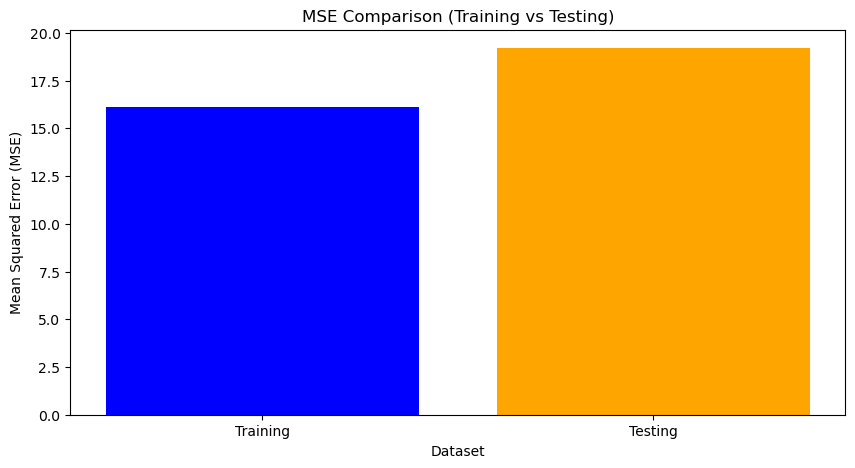

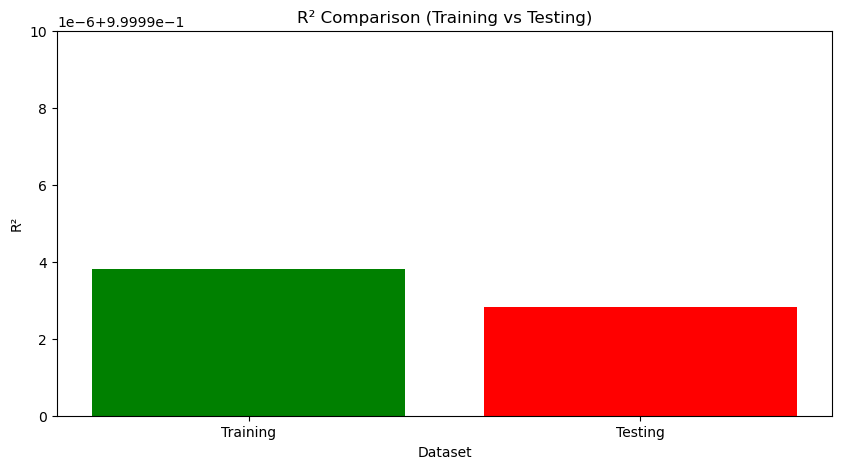

In [1]:
import matplotlib.pyplot as plt

# Data for plotting
performance_data = {
    "Dataset": ["Training", "Testing"],
    "MSE": [16.10376944722457, 19.201264658806327],
    "R²": [0.9999938095631967, 0.9999928185210056]
}

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(performance_data["Dataset"], performance_data["MSE"], color=["blue", "orange"])
plt.title("MSE Comparison (Training vs Testing)")
plt.xlabel("Dataset")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(performance_data["Dataset"], performance_data["R²"], color=["green", "red"])
plt.title("R² Comparison (Training vs Testing)")
plt.xlabel("Dataset")
plt.ylabel("R²")
plt.ylim(0.99999, 1.0)  # Adjust scale to highlight differences
plt.show()


In [2]:
import matplotlib.pyplot as plt

# Scatter plot for the training set
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred_final, alpha=0.5, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Scatter Plot: Actual vs Predicted (Training Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# Scatter plot for the testing set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred_final, alpha=0.5, color='orange', label='Testing Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Scatter Plot: Actual vs Predicted (Testing Set)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


NameError: name 'y_train' is not defined

<Figure size 1000x500 with 0 Axes>

**polynomial feature implementation**

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Define predictors and target variable
predictors = ['open', 'high', 'low', 'sma5', 'ema10']  # Example predictors
X = df[predictors]
y = df['close']

# Step 2: Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 3: Split the polynomial data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Train the MLR model on polynomial features
mlr_poly_model = LinearRegression()
mlr_poly_model.fit(X_train_poly, y_train)

# Step 5: Make predictions on both training and testing sets
y_train_pred_poly = mlr_poly_model.predict(X_train_poly)
y_test_pred_poly = mlr_poly_model.predict(X_test_poly)

# Step 6: Evaluate the model
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

# Output results
print("Training MSE with Polynomial Features:", mse_train_poly)
print("Training R² with Polynomial Features:", r2_train_poly)
print("Testing MSE with Polynomial Features:", mse_test_poly)
print("Testing R² with Polynomial Features:", r2_test_poly)


Training MSE with Polynomial Features: 15.623375623264437
Training R² with Polynomial Features: 0.9999939942309926
Testing MSE with Polynomial Features: 19.202081285243555
Testing R² with Polynomial Features: 0.9999928182155786


# RIDGE/LASSO

In [55]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression on Polynomial Features
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train_poly, y_train)

# Predictions and evaluation for Ridge
y_train_pred_ridge = ridge.predict(X_train_poly)
y_test_pred_ridge = ridge.predict(X_test_poly)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression Training MSE:", mse_train_ridge)
print("Ridge Regression Training R²:", r2_train_ridge)
print("Ridge Regression Testing MSE:", mse_test_ridge)
print("Ridge Regression Testing R²:", r2_test_ridge)

# Lasso Regression on Polynomial Features
lasso = Lasso(alpha=0.01)  # Regularization strength
lasso.fit(X_train_poly, y_train)

# Predictions and evaluation for Lasso
y_train_pred_lasso = lasso.predict(X_train_poly)
y_test_pred_lasso = lasso.predict(X_test_poly)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print("\nLasso Regression Training MSE:", mse_train_lasso)
print("Lasso Regression Training R²:", r2_train_lasso)
print("Lasso Regression Testing MSE:", mse_test_lasso)
print("Lasso Regression Testing R²:", r2_test_lasso)


Ridge Regression Training MSE: 15.62337562346398
Ridge Regression Training R²: 0.9999939942309926
Ridge Regression Testing MSE: 19.202089051238637
Ridge Regression Testing R²: 0.999992818212674

Lasso Regression Training MSE: 94.3684068826825
Lasso Regression Training R²: 0.999963723918121
Lasso Regression Testing MSE: 103.83064964611525
Lasso Regression Testing R²: 0.9999611662230249


**Ridge Regression:**
Retains the low MSE and high 𝑅2
making it the better choice among the two.
Reduces the risk of overfitting while maintaining predictive accuracy.

**Lasso Regression:**
Performs worse than Ridge, likely due to excessive feature penalization, resulting in a higher MSE and slightly lower 
𝑅2
 .

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Define the parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression with GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_poly, y_train)

# Best Ridge alpha and corresponding score
best_alpha_ridge = ridge_cv.best_params_['alpha']
best_score_ridge = -ridge_cv.best_score_

# Lasso Regression with GridSearchCV
lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_poly, y_train)

# Best Lasso alpha and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso = -lasso_cv.best_score_

# Print the results
print("Best Ridge alpha:", best_alpha_ridge)
print("Best Ridge MSE:", best_score_ridge)
print("\nBest Lasso alpha:", best_alpha_lasso)
print("Best Lasso MSE:", best_score_lasso)


Best Ridge alpha: 0.001
Best Ridge MSE: 17.038673337495233

Best Lasso alpha: 100
Best Lasso MSE: 94.37116300414625


In [57]:
# Retrain Ridge with the best alpha on the entire training set
final_ridge = Ridge(alpha=best_alpha_ridge)
final_ridge.fit(X_train_poly, y_train)

# Evaluate the model on training and testing sets
y_train_pred_final = final_ridge.predict(X_train_poly)
y_test_pred_final = final_ridge.predict(X_test_poly)

mse_train_final = mean_squared_error(y_train, y_train_pred_final)
r2_train_final = r2_score(y_train, y_train_pred_final)

mse_test_final = mean_squared_error(y_test, y_test_pred_final)
r2_test_final = r2_score(y_test, y_test_pred_final)

# Output results
print("Final Ridge Training MSE:", mse_train_final)
print("Final Ridge Training R²:", r2_train_final)
print("Final Ridge Testing MSE:", mse_test_final)
print("Final Ridge Testing R²:", r2_test_final)


Final Ridge Training MSE: 15.623375623293434
Final Ridge Training R²: 0.9999939942309926
Final Ridge Testing MSE: 19.202082856569053
Final Ridge Testing R²: 0.999992818214991
